<a href="https://colab.research.google.com/github/AdirGelkop/Bitcoin/blob/main/New_Bitcoin_ML_Prediction_Flow_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Screening AI Project

The goal in our project is to predict Bitcoin's value using regression analysis. The project involves leveraging data from other stock performances to build a predictive model for cryptocurrency trends.

## Initial Preparations

In [ ]:
#!pip install yfinance # If not installed, you need to install it.


***Module Imports***

In [76]:
import yfinance as yf
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np


***Importing : Stocks, Commodities, Indices***

In [77]:
# Ticker symbols for selected [Stocks, Commodities, Indices] from yfinance
tickers = {
    'U.S. Dollar Index': 'DX-Y.NYB',   # Dollar Index
    'MicroStrategy': 'MSTR',           # MicroStrategy Incorporated
    'Marathon Digital Holdings': 'MARA', # Marathon Digital Holdings, Inc.
    'Gold Futures': 'GC=F',            # Gold Futures
    'Crude Oil': 'CL=F',               # Crude Oil WTI Futures
    'Copper Futures': 'HG=F',          # Copper Futures
    'S&P 500': '^GSPC',                # S&P 500 Index
    'Tether': 'USDT-USD',              # Tether (Stablecoin)
    'USD Coin': 'USDC-USD',            # USD Coin (Stablecoin)
    'Ethereum': 'ETH-USD',             # Ethereum (Cryptocurrency)
    'Litecoin': 'LTC-USD',             # Litecoin (Cryptocurrency)
    'Galaxy Digital Holdings': 'GLXY.TO', # Galaxy Digital Holdings Ltd. (Toronto Stock Exchange)
    'Coinbase': 'COIN',                # Coinbase Global, Inc.
    'Ripple': 'XRP-USD'                # Ripple (Cryptocurrency)
}


In [78]:
# Main DataFrame
assets_df = pd.DataFrame()

# Iterate over each asset and merge it into the main DataFrame
print("Fetching data for assets:\n")
for asset_name, ticker in tickers.items():
    print(f"- {asset_name} ({ticker})...", end="")
    try:
        # Download the asset data with progress bar suppressed
        asset_data = yf.download(ticker, start='2014-01-01', interval='1d', progress=False)

        # Ensure 'Date' column is accessible
        asset_data.reset_index(inplace=True)  # Make 'Date' a simple column
        asset_data['Returns'] = asset_data['Adj Close'].pct_change()  # Calculate returns

        # Select only 'Date' and 'Returns', rename the columns for clarity
        asset_data = asset_data[['Date', 'Returns']].rename(columns={  # Flatten columns
            'Returns': f"{asset_name}_Returns"
        })

        # Merge with the assets_df
        if assets_df.empty:
            assets_df = asset_data
        else:
            assets_df = pd.merge(assets_df, asset_data, on='Date', how='left')

        print("Done.")
    except Exception as e:
        print(f"Failed! Error: {e}")

# Remove MultiIndex levels if present
if isinstance(assets_df.columns, pd.MultiIndex):
    assets_df.columns = [col[1] if col[1] else col[0] for col in assets_df.columns]

# Display the resulting DataFrame
print("\nAssets DataFrame:")
assets_df.head()


Fetching data for assets:

- U.S. Dollar Index (DX-Y.NYB)...Done.
- MicroStrategy (MSTR)...Done.
- Marathon Digital Holdings (MARA)...Done.
- Gold Futures (GC=F)...Done.
- Crude Oil (CL=F)...

<ipython-input-78-ce4c89daf25f>:25: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  assets_df = pd.merge(assets_df, asset_data, on='Date', how='left')
<ipython-input-78-ce4c89daf25f>:25: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  assets_df = pd.merge(assets_df, asset_data, on='Date', how='left')


Done.
- Copper Futures (HG=F)...Done.
- S&P 500 (^GSPC)...Done.
- Tether (USDT-USD)...Done.
- USD Coin (USDC-USD)...Done.
- Ethereum (ETH-USD)...Done.
- Litecoin (LTC-USD)...Done.
- Galaxy Digital Holdings (GLXY.TO)...Done.
- Coinbase (COIN)...Done.
- Ripple (XRP-USD)...Done.

Assets DataFrame:


<ipython-input-78-ce4c89daf25f>:25: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  assets_df = pd.merge(assets_df, asset_data, on='Date', how='left')


,Date,U.S. Dollar Index_Returns,MicroStrategy_Returns,Marathon Digital Holdings_Returns,Gold Futures_Returns,Crude Oil_Returns,Copper Futures_Returns,S&P 500_Returns,Tether_Returns,USD Coin_Returns,Ethereum_Returns,Litecoin_Returns,Galaxy Digital Holdings_Returns,Coinbase_Returns,Ripple_Returns
0,2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-01-03,0.001984,-0.002186,-0.040323,0.010939,-0.015507,-0.007431,-0.000333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-01-06,-0.001733,-0.014766,-0.011765,-0.000484,-0.005641,0.001762,-0.002512,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-01-07,0.002232,0.012516,-0.020408,-0.006786,0.002569,-0.000293,0.006082,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-01-08,0.002598,-0.004229,0.005208,-0.003335,-0.014306,-0.005130,-0.000212,NaN,NaN,NaN,NaN,NaN,NaN,NaN


***Importing Bitcoin Data***

In [79]:
# Download Bitcoin data
bitcoin_ticker = 'BTC-USD'

print(f"- Bitcoin ({bitcoin_ticker})...", end="")
try:
    # Fetch Bitcoin data
    bitcoin_df = yf.download(bitcoin_ticker, start='2014-01-01', interval='1d', progress=False)
    bitcoin_df['Bitcoin_Returns'] = bitcoin_df['Adj Close'].pct_change()

    # Keep only the returns column and reset the index
    bitcoin_df = bitcoin_df[['Bitcoin_Returns']]
    bitcoin_df.reset_index(inplace=True)

    # Ensure clean columns (flat structure)
    bitcoin_df.columns = ['Date', 'Bitcoin_Returns']
    print("Done.")
except Exception as e:
    print(f"Failed. Error: {e}")

# Display the Bitcoin DataFrame
print("\nBitcoin DataFrame:\n")
bitcoin_df.head()


- Bitcoin (BTC-USD)...Done.

Bitcoin DataFrame:



,Date,Bitcoin_Returns
0,2014-09-17,NaN
1,2014-09-18,-0.071926
2,2014-09-19,-0.069843
3,2014-09-20,0.035735
4,2014-09-21,-0.024659


***Importing : Macroeconomic Indicators***

In [80]:
# Define macroeconomic indicators for pandas_datareader
macro_indicators = {
    'GDP': 'GDP',                      # Gross Domestic Product
    'Money Supply M2': 'WM2NS',        # Money Supply M2
    'Credit Conditions Index': 'DRTSCILM', # Credit Conditions Index
    'Financial Stress Index': 'NFCI',  # National Financial Conditions Index
    '10-Year Inflation-Protected Bonds': 'DFII10', # 10-Year TIPS Bonds
    'High-Yield Corporate Bonds Spread': 'BAMLH0A0HYM2', # High-Yield Corporate Bond Spread
    'Federal Funds Rate': 'FEDFUNDS',  # Federal Funds Rate (Interest Rate)
    'Consumer Price Index (CPI)': 'CPIAUCSL', # Consumer Price Index (Inflation)
    'Market Volatility (VIX)': 'VIXCLS' # Volatility Index
}


In [81]:
# Set the start and end dates
start_date = '2014-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')

# Main DataFrame for macroeconomic indicators
macro_indicators_df = pd.DataFrame()

# Fetch macroeconomic indicators and format them
print("Fetching data for macroeconomic indicators:\n")
for indicator_name, fred_code in macro_indicators.items():
    print(f"- {indicator_name} ({fred_code})...", end="")
    try:
        # Fetch the data from FRED
        data = pdr.DataReader(fred_code, 'fred', start_date, end_date)
        data.reset_index(inplace=True)  # Reset index to make 'DATE' a simple column
        data.rename(columns={'DATE': 'Date', fred_code: indicator_name}, inplace=True)

        # Calculate Returns and keep only the Returns column
        data[f"{indicator_name}_Returns"] = data[indicator_name].pct_change(fill_method=None)
        data = data[['Date', f"{indicator_name}_Returns"]]

        # Merge with the main macro_indicators_df
        if macro_indicators_df.empty:
            macro_indicators_df = data
        else:
            macro_indicators_df = pd.merge(macro_indicators_df, data, on='Date', how='outer')

        print("Done.")
    except Exception as e:
        print(f"Failed! Error: {e}")

# Flatten the column structure
macro_indicators_df.columns = ['Date' if col == 'Date' else col for col in macro_indicators_df.columns]

# Display the resulting DataFrame
print("\nCombined Macro Indicators DataFrame (Returns Only, Flattened Columns):")
macro_indicators_df.head()


Fetching data for macroeconomic indicators:

- GDP (GDP)...Done.
- Money Supply M2 (WM2NS)...Done.
- Credit Conditions Index (DRTSCILM)...Done.
- Financial Stress Index (NFCI)...Done.
- 10-Year Inflation-Protected Bonds (DFII10)...Done.
- High-Yield Corporate Bonds Spread (BAMLH0A0HYM2)...Done.
- Federal Funds Rate (FEDFUNDS)...Done.
- Consumer Price Index (CPI) (CPIAUCSL)...Done.
- Market Volatility (VIX) (VIXCLS)...Done.

Combined Macro Indicators DataFrame (Returns Only, Flattened Columns):


,Date,GDP_Returns,Money Supply M2_Returns,Credit Conditions Index_Returns,Financial Stress Index_Returns,10-Year Inflation-Protected Bonds_Returns,High-Yield Corporate Bonds Spread_Returns,Federal Funds Rate_Returns,Consumer Price Index (CPI)_Returns,Market Volatility (VIX)_Returns
0,2014-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-01-03,NaN,NaN,NaN,NaN,0.013514,-0.005000,NaN,NaN,-0.033029
3,2014-01-06,NaN,NaN,NaN,NaN,-0.040000,-0.005025,NaN,NaN,-0.015262
4,2014-01-07,NaN,NaN,NaN,NaN,-0.027778,-0.010101,NaN,NaN,-0.046494


***Merging all 3 Dataframes : assets_df,macro_indicators_df, bitcoin_df***

In [82]:
# Rename 'DATE' to 'Date' in macro_indicators_df
macro_indicators_df.rename(columns={'DATE': 'Date'}, inplace=True)

# Drop existing index if needed and reset index for all DataFrames
assets_df = assets_df.reset_index(drop=True)
bitcoin_df = bitcoin_df.reset_index(drop=True)

# Merge all DataFrames on 'Date'
merged_df = pd.merge(macro_indicators_df, assets_df, on='Date', how='left')
merged_df = pd.merge(merged_df, bitcoin_df, on='Date', how='left')

# Display the merged DataFrame without filling missing values
print("\nFinal Merged DataFrame (without ffill):\n")
merged_df.head()



Final Merged DataFrame (without ffill):



,Date,GDP_Returns,Money Supply M2_Returns,Credit Conditions Index_Returns,Financial Stress Index_Returns,10-Year Inflation-Protected Bonds_Returns,High-Yield Corporate Bonds Spread_Returns,Federal Funds Rate_Returns,Consumer Price Index (CPI)_Returns,Market Volatility (VIX)_Returns,...,Copper Futures_Returns,S&P 500_Returns,Tether_Returns,USD Coin_Returns,Ethereum_Returns,Litecoin_Returns,Galaxy Digital Holdings_Returns,Coinbase_Returns,Ripple_Returns,Bitcoin_Returns
0,2014-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-01-03,NaN,NaN,NaN,NaN,0.013514,-0.005000,NaN,NaN,-0.033029,...,-0.007431,-0.000333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-01-06,NaN,NaN,NaN,NaN,-0.040000,-0.005025,NaN,NaN,-0.015262,...,0.001762,-0.002512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-01-07,NaN,NaN,NaN,NaN,-0.027778,-0.010101,NaN,NaN,-0.046494,...,-0.000293,0.006082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


***Taking care of NaN values***

In [83]:
# Forward fill (ffill) is the primary method to handle missing data, as it assumes continuity in economic returns.
merged_df.ffill(inplace=True)

# Check if any NaNs remain after ffill and handle them
if merged_df.isna().sum().sum() > 0:
    # Backward fill (bfill) is used as a secondary option for isolated NaNs at the beginning of the dataset.
    # In economics, returns often follow patterns that depend on historical values (continuity). Filling missing values based on nearby known data (via ffill and bfill) aligns with how returns behave in the real world.
    merged_df.bfill(inplace=True)

# Display the filled DataFrame
print("\nMerged DataFrame after filling missing values:\n")
merged_df.head()



Merged DataFrame after filling missing values:



,Date,GDP_Returns,Money Supply M2_Returns,Credit Conditions Index_Returns,Financial Stress Index_Returns,10-Year Inflation-Protected Bonds_Returns,High-Yield Corporate Bonds Spread_Returns,Federal Funds Rate_Returns,Consumer Price Index (CPI)_Returns,Market Volatility (VIX)_Returns,...,Copper Futures_Returns,S&P 500_Returns,Tether_Returns,USD Coin_Returns,Ethereum_Returns,Litecoin_Returns,Galaxy Digital Holdings_Returns,Coinbase_Returns,Ripple_Returns,Bitcoin_Returns
0,2014-01-01,0.018652,-0.004289,-0.189781,-0.005724,0.013514,-0.005000,0.0,0.001101,-0.033029,...,-0.007431,-0.000333,-0.002152,0.00464,-0.067411,-0.0738,-0.026667,-0.016845,-0.0506,-0.071926
1,2014-01-02,0.018652,-0.004289,-0.189781,-0.005724,0.013514,-0.005000,0.0,0.001101,-0.033029,...,-0.007431,-0.000333,-0.002152,0.00464,-0.067411,-0.0738,-0.026667,-0.016845,-0.0506,-0.071926
2,2014-01-03,0.018652,-0.004289,-0.189781,-0.005724,0.013514,-0.005000,0.0,0.001101,-0.033029,...,-0.007431,-0.000333,-0.002152,0.00464,-0.067411,-0.0738,-0.026667,-0.016845,-0.0506,-0.071926
3,2014-01-06,0.018652,-0.004289,-0.189781,-0.005724,-0.040000,-0.005025,0.0,0.001101,-0.015262,...,0.001762,-0.002512,-0.002152,0.00464,-0.067411,-0.0738,-0.026667,-0.016845,-0.0506,-0.071926
4,2014-01-07,0.018652,-0.004289,-0.189781,-0.005724,-0.027778,-0.010101,0.0,0.001101,-0.046494,...,-0.000293,0.006082,-0.002152,0.00464,-0.067411,-0.0738,-0.026667,-0.016845,-0.0506,-0.071926


***Feature Engineering - Adding 3 Features : Copper_to_Gold_Ratio, Money_to_Dollar_Ratio, Global_Velocity***

In [84]:
# Initialize Prices DataFrame
price_data = pd.DataFrame(index=merged_df.index)
# Assuming initial price to be 1 as we relate to price ratio
initial_price = 1

# Define assets for which prices need to be reconstructed for 3 new features creation
assets_for_prices = {
    'Copper_Price': 'Copper Futures_Returns',
    'Gold_Price': 'Gold Futures_Returns',
    'DXY': 'U.S. Dollar Index_Returns',
    'M2': 'Money Supply M2_Returns',
    'GDP': 'GDP_Returns'
}

# Reconstruct Prices from Returns
for price_col, return_col in assets_for_prices.items():
    if return_col in merged_df.columns:
        # Mathematical explanation: Reconstructs the price using the cumulative product of (1 + daily return),
        # assuming an initial price of 1. This simulates the compounding effect of returns over time.
        price_data[price_col] = (1 + merged_df[return_col]).cumprod() * initial_price
    else:
        print(f"Warning: {return_col} not found in merged_df")

# Calculate New Features
if 'Copper_Price' in price_data.columns and 'Gold_Price' in price_data.columns:
    price_data['Copper_to_Gold_Ratio'] = price_data['Copper_Price'] / price_data['Gold_Price']
else:
    print("Warning: Copper_Price or Gold_Price missing for Copper_to_Gold_Ratio calculation")

if 'M2' in price_data.columns and 'DXY' in price_data.columns:
    price_data['Money_to_Dollar_Ratio'] = price_data['M2'] / price_data['DXY']
else:
    print("Warning: M2 or DXY missing for Money_to_Dollar_Ratio calculation")

if 'GDP' in price_data.columns and 'M2' in price_data.columns:
    price_data['Global_Velocity'] = price_data['GDP'] / price_data['M2']
else:
    print("Warning: GDP or M2 missing for Global_Velocity calculation")

# Merge New Features into merged_df
for col in ['Copper_to_Gold_Ratio', 'Money_to_Dollar_Ratio', 'Global_Velocity']:
    if col in price_data.columns:
        # Add the calculated feature to the merged DataFrame under the 'Feature' category
        merged_df[col] = price_data[col]
    else:
        print(f"Warning: {col} not calculated and will not be added to merged_df")

# Move Bitcoin_Returns to the last column
bitcoin_column = merged_df.pop('Bitcoin_Returns')  # Remove the column from its current position
merged_df['Bitcoin_Returns'] = bitcoin_column      # Add it back as the last column

# Display the updated merged_df with new features
print("\nUpdated merged_df with new features:\n")
merged_df.head()



Updated merged_df with new features:



,Date,GDP_Returns,Money Supply M2_Returns,Credit Conditions Index_Returns,Financial Stress Index_Returns,10-Year Inflation-Protected Bonds_Returns,High-Yield Corporate Bonds Spread_Returns,Federal Funds Rate_Returns,Consumer Price Index (CPI)_Returns,Market Volatility (VIX)_Returns,...,USD Coin_Returns,Ethereum_Returns,Litecoin_Returns,Galaxy Digital Holdings_Returns,Coinbase_Returns,Ripple_Returns,Copper_to_Gold_Ratio,Money_to_Dollar_Ratio,Global_Velocity,Bitcoin_Returns
0,2014-01-01,0.018652,-0.004289,-0.189781,-0.005724,0.013514,-0.005000,0.0,0.001101,-0.033029,...,0.00464,-0.067411,-0.0738,-0.026667,-0.016845,-0.0506,0.981829,0.993739,1.023040,-0.071926
1,2014-01-02,0.018652,-0.004289,-0.189781,-0.005724,0.013514,-0.005000,0.0,0.001101,-0.033029,...,0.00464,-0.067411,-0.0738,-0.026667,-0.016845,-0.0506,0.963988,0.987517,1.046610,-0.071926
2,2014-01-03,0.018652,-0.004289,-0.189781,-0.005724,0.013514,-0.005000,0.0,0.001101,-0.033029,...,0.00464,-0.067411,-0.0738,-0.026667,-0.016845,-0.0506,0.946471,0.981334,1.070724,-0.071926
3,2014-01-06,0.018652,-0.004289,-0.189781,-0.005724,-0.040000,-0.005025,0.0,0.001101,-0.015262,...,0.00464,-0.067411,-0.0738,-0.026667,-0.016845,-0.0506,0.948598,0.978821,1.095393,-0.071926
4,2014-01-07,0.018652,-0.004289,-0.189781,-0.005724,-0.027778,-0.010101,0.0,0.001101,-0.046494,...,0.00464,-0.067411,-0.0738,-0.026667,-0.016845,-0.0506,0.954799,0.972453,1.120631,-0.071926


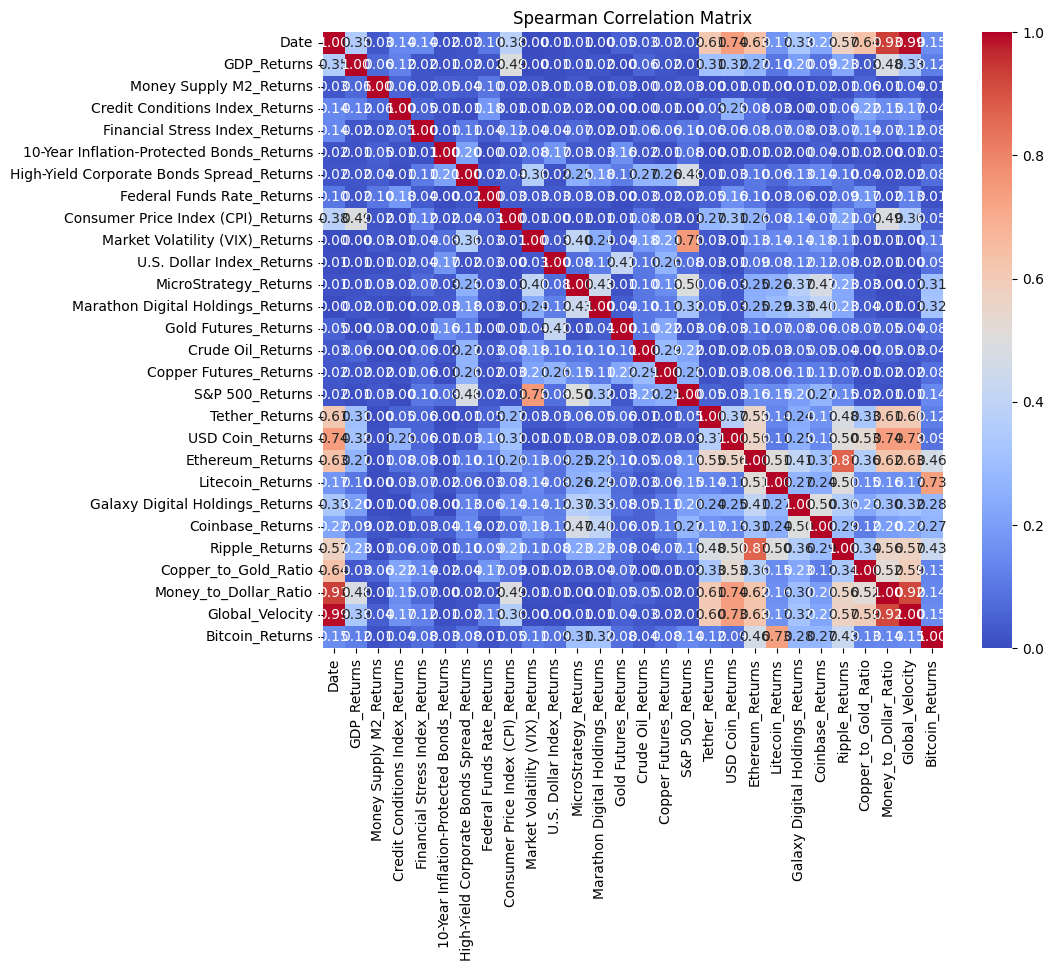

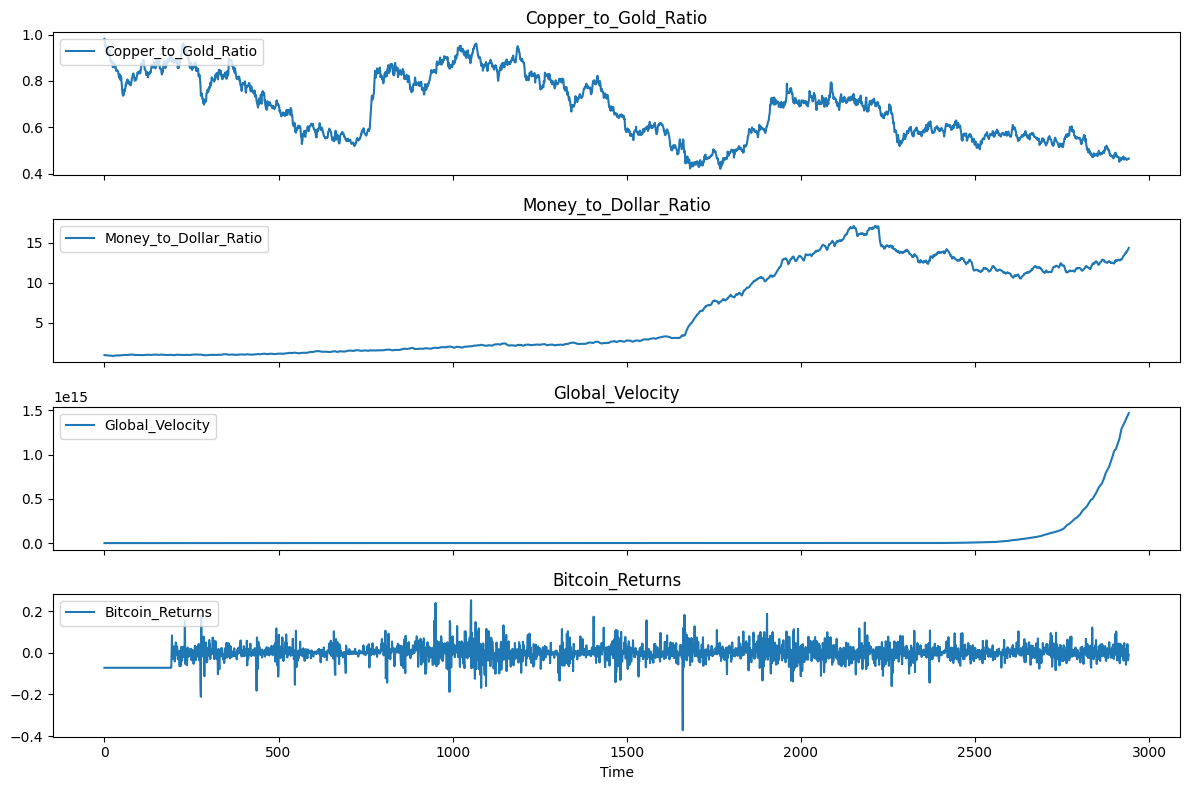


Spearman Correlations with Bitcoin_Returns (sorted):

Bitcoin_Returns                              1.000000
Litecoin_Returns                             0.731972
Ethereum_Returns                             0.463560
Ripple_Returns                               0.432178
Marathon Digital Holdings_Returns            0.317360
MicroStrategy_Returns                        0.306848
Galaxy Digital Holdings_Returns              0.277889
Coinbase_Returns                             0.271644
Date                                         0.153337
Global_Velocity                              0.148526
S&P 500_Returns                              0.143015
Money_to_Dollar_Ratio                        0.136748
Copper_to_Gold_Ratio                         0.129356
Tether_Returns                               0.120099
GDP_Returns                                  0.117349
Market Volatility (VIX)_Returns              0.112534
USD Coin_Returns                             0.088981
U.S. Dollar Index_Returns  

In [89]:
# Correlation Matrix Heatmap (using Spearman correlation for time series)
# Spearman correlation is used because it measures monotonic relationships and is less sensitive to outliers,
# which are common in financial returns.
plt.figure(figsize=(10, 8))
correlation_matrix = merged_df.corr(method='spearman').abs()  # Absolute values for correlations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=0, vmax=1)
plt.title("Spearman Correlation Matrix")
plt.show()

# Time Series Trends for Financial Features
# Visualize each feature in separate subplots for clarity
financial_features = ['Copper_to_Gold_Ratio', 'Money_to_Dollar_Ratio', 'Global_Velocity', 'Bitcoin_Returns']
fig, axs = plt.subplots(len(financial_features), 1, figsize=(12, 8), sharex=True)

for i, feature in enumerate(financial_features):
    axs[i].plot(merged_df.index, merged_df[feature], label=feature)
    axs[i].set_title(feature)
    axs[i].legend(loc='upper left')

plt.xlabel("Time")
plt.tight_layout()
plt.show()

# Sorted Bitcoin Correlations
# Display sorted correlations of all features with Bitcoin_Returns
bitcoin_correlation = correlation_matrix['Bitcoin_Returns'].sort_values(ascending=False)
print("\nSpearman Correlations with Bitcoin_Returns (sorted):\n")
print(bitcoin_correlation)
